In [1]:
import sqlite3
import pandas as pd

# connect to SQLite
conn = sqlite3.connect("../db/seattle_airbnb.db")

# load calendar table
reviews = pd.read_sql("SELECT * FROM reviews", conn)
conn.close()

# quick view
print(reviews.shape)
reviews.head()

(84849, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [2]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [3]:
reviews = reviews[['listing_id', 'date', 'comments']]
reviews['date'] = pd.to_datetime(reviews['date'])

In [5]:
!pip install textblob

Active code page: 1252
  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
Using cached textblob-0.19.0-py3-none-any.whl (624 kB)



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!python -m textblob.download_corpora

Active code page: 1252
Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\elias\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\elias\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elias\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\elias\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\elias\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\elias\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is alr

In [8]:
from textblob import TextBlob

reviews['sentiment'] = reviews['comments'].apply(
    lambda x: TextBlob(x).sentiment.polarity if pd.notnull(x) else 0
)

In [10]:
reviews

,listing_id,date,comments,sentiment
0,7202016,2015-07-19,Cute and cozy place. Perfect location to every...,0.433333
1,7202016,2015-07-20,Kelly has a great room in a very central locat...,0.301136
2,7202016,2015-07-26,"Very spacious apartment, and in a great neighb...",0.410417
3,7202016,2015-08-02,Close to Seattle Center and all it has to offe...,0.358333
4,7202016,2015-08-10,Kelly was a great host and very accommodating ...,0.493485
...,...,...,...,...
84844,3624990,2015-10-12,The description and pictures of the apartment ...,0.194844
84845,3624990,2015-10-17,We had an excellent stay. It was clean and com...,0.311111
84846,3624990,2015-10-20,"Gran ubicación, cerca de todo lo atractivo del...",0.000000
84847,3624990,2015-11-02,"Very good apartement, clean and well sized. Si...",0.216852


In [13]:
reviews['month_num'] = reviews['date'].dt.month
monthly_sentiment = reviews.groupby('month_num')['sentiment'].mean()

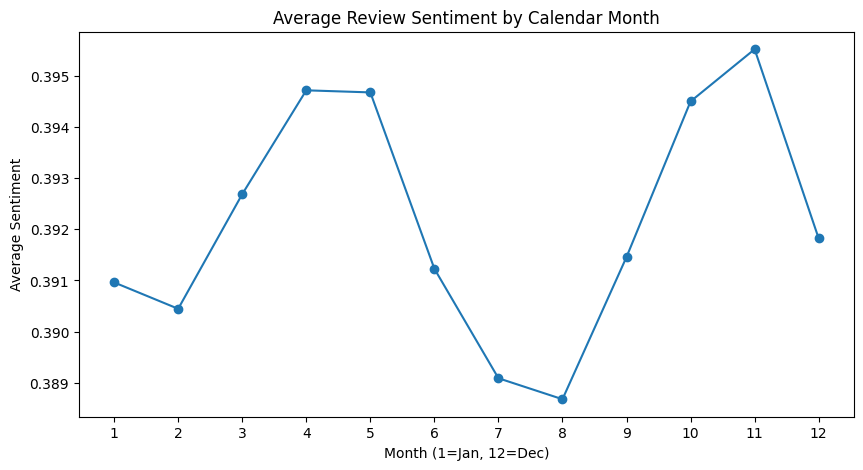

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
monthly_sentiment.plot(marker='o', title="Average Review Sentiment by Calendar Month")
plt.xticks(range(1,13))
plt.xlabel("Month (1=Jan, 12=Dec)")
plt.ylabel("Average Sentiment")
plt.show()

In [15]:
# choose columns
reviews_clean = reviews[['listing_id', 'date', 'sentiment', 'comments']]
# save
reviews_clean.to_csv("../data/processed/reviews_cleaned.csv", index=False)
print("✅ saved reviews_cleaned.csv in data/processed")


✅ saved reviews_cleaned.csv in data/processed
